<a href="https://colab.research.google.com/github/sambhramnaregal/Student-Depression-Detection/blob/main/Student_Depression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download("hopesb/student-depression-dataset")

files=os.listdir(path)
print(files)
depression_data = pd.read_csv(path+"/"+files[0])
df=depression_data.copy()




Using Colab cache for faster access to the 'student-depression-dataset' dataset.
['Student Depression Dataset.csv']


In [ ]:
depression_data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
depression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
null_v = depression_data.isnull().sum()
print(null_v)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
depression_data['Financial Stress'] = imputer.fit_transform(depression_data[['Financial Stress']])

In [ ]:
unique_profess = depression_data['Profession'].unique()
unique_degree = depression_data['Degree'].unique()
unique_city = depression_data['City'].unique()
print(unique_city)
print(unique_profess)
print(unique_degree)

['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']


In [ ]:
depression_data=depression_data[depression_data['Profession'] == 'Student']

In [ ]:
depression_data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000
mean,70439.182634,25.821134,3.140617,0.000431,7.656028,2.943559,0.000682,7.157948,3.139720,0.585145
std,40633.159539,4.906574,1.381640,0.044016,1.470835,1.361209,0.044419,3.707180,1.437341,0.492706
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35055.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70654.500000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105813.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


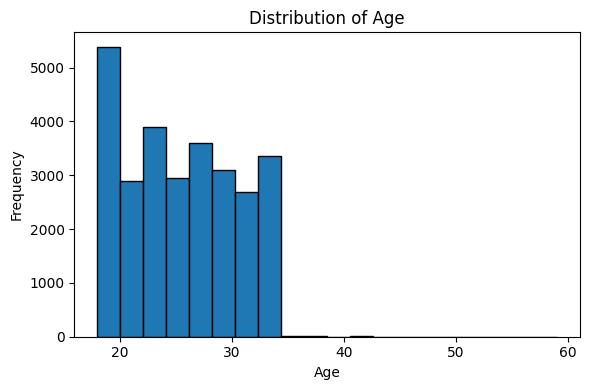

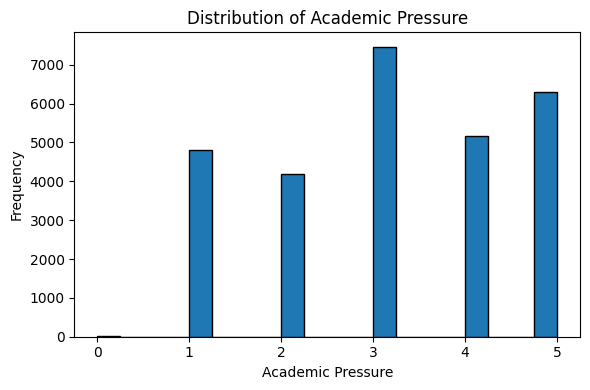

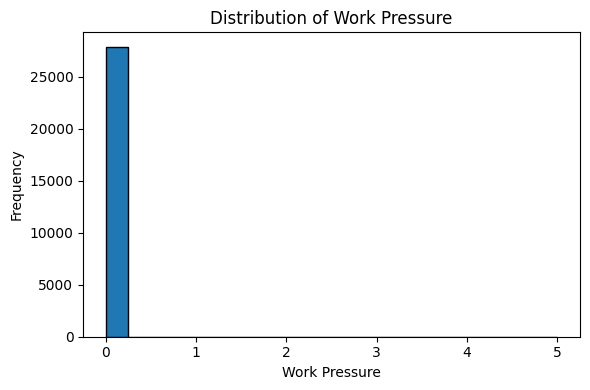

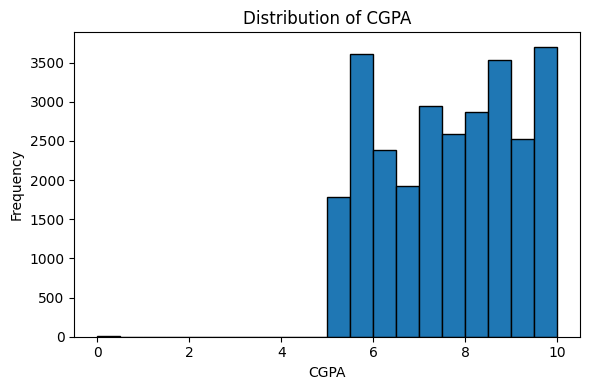

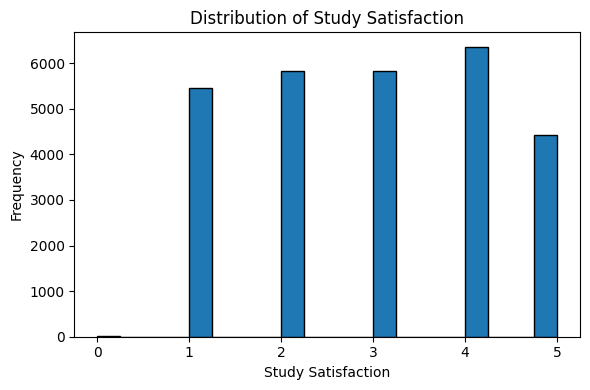

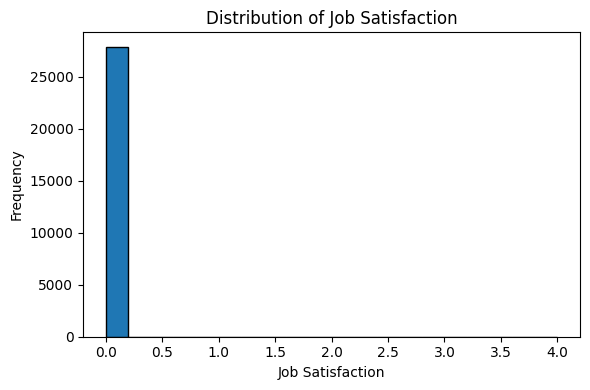

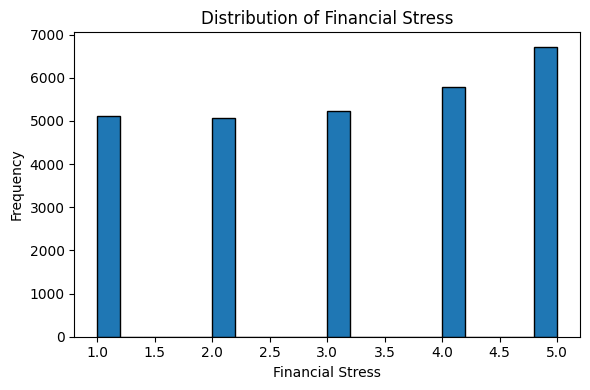

In [ ]:
numeric_cols = [
    'Age','Academic Pressure','Work Pressure','CGPA',
    'Study Satisfaction','Job Satisfaction', 'Financial Stress'
]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


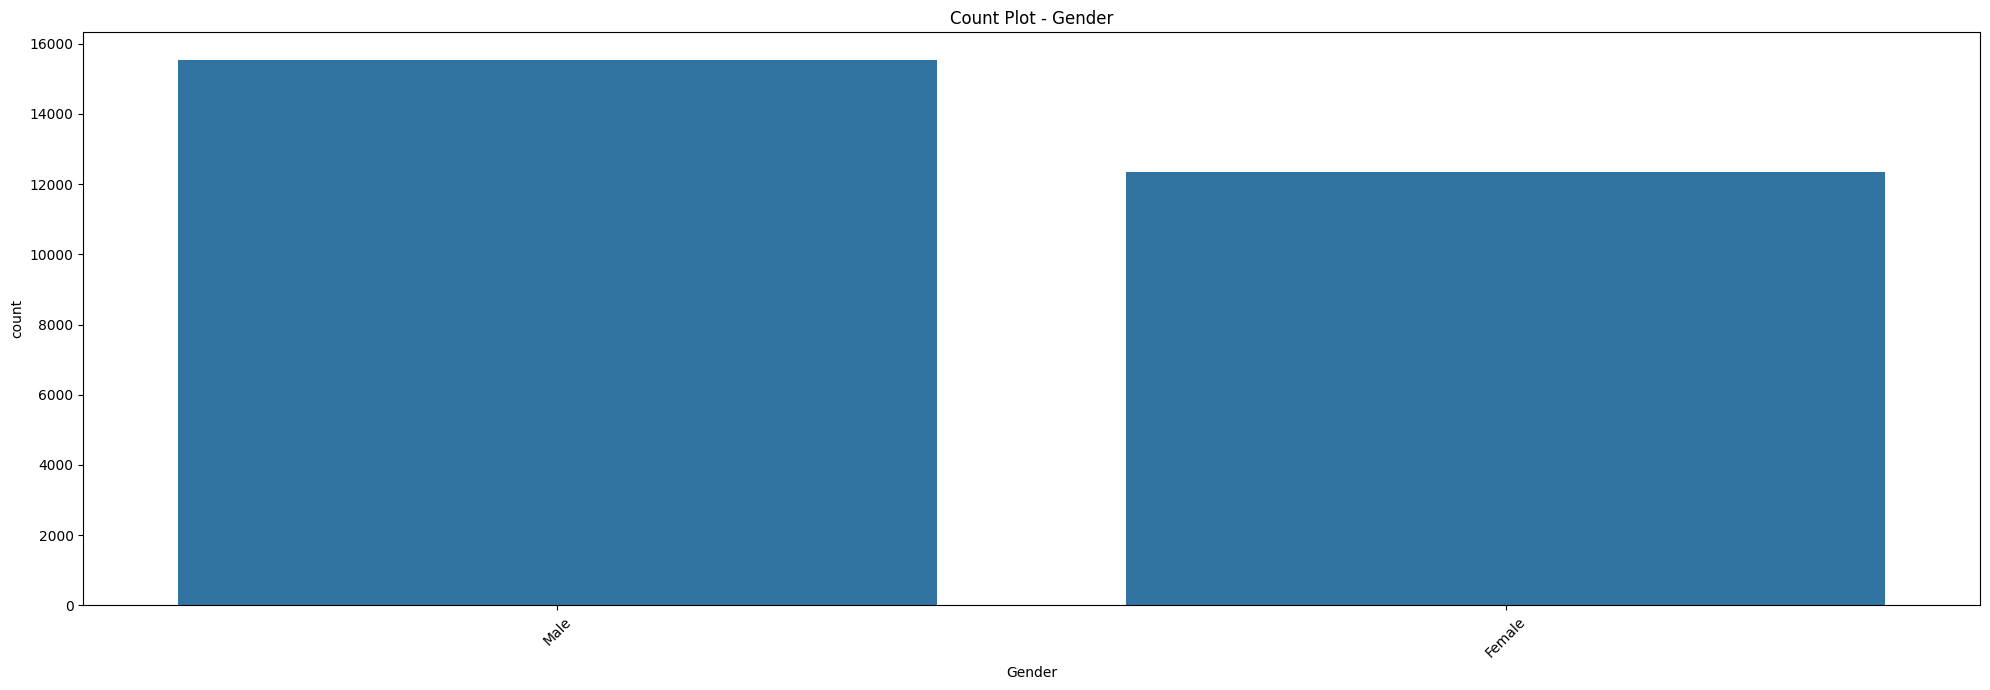

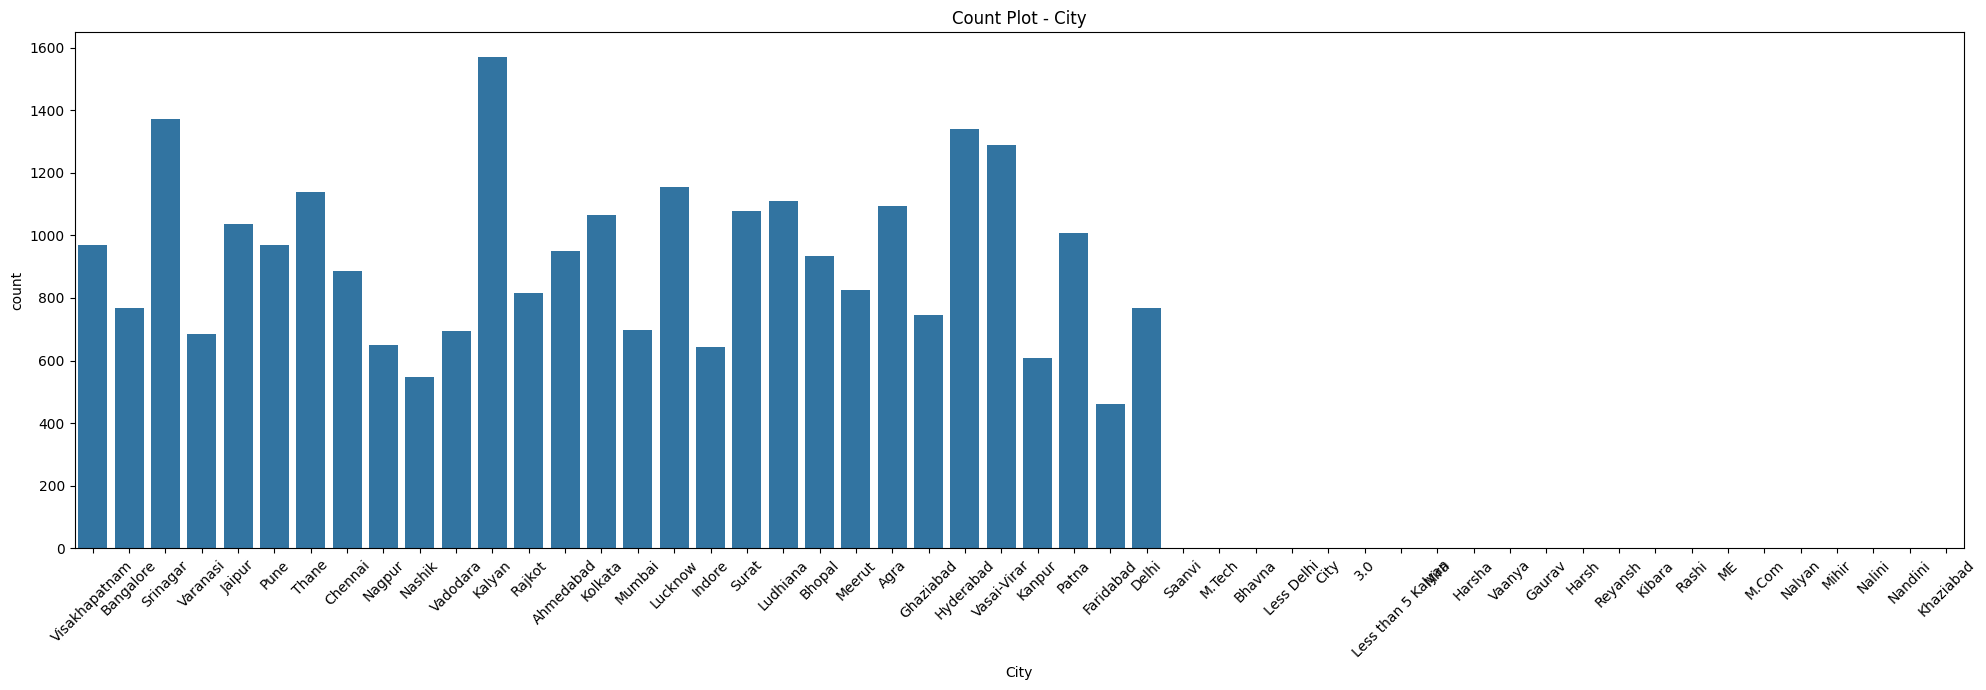

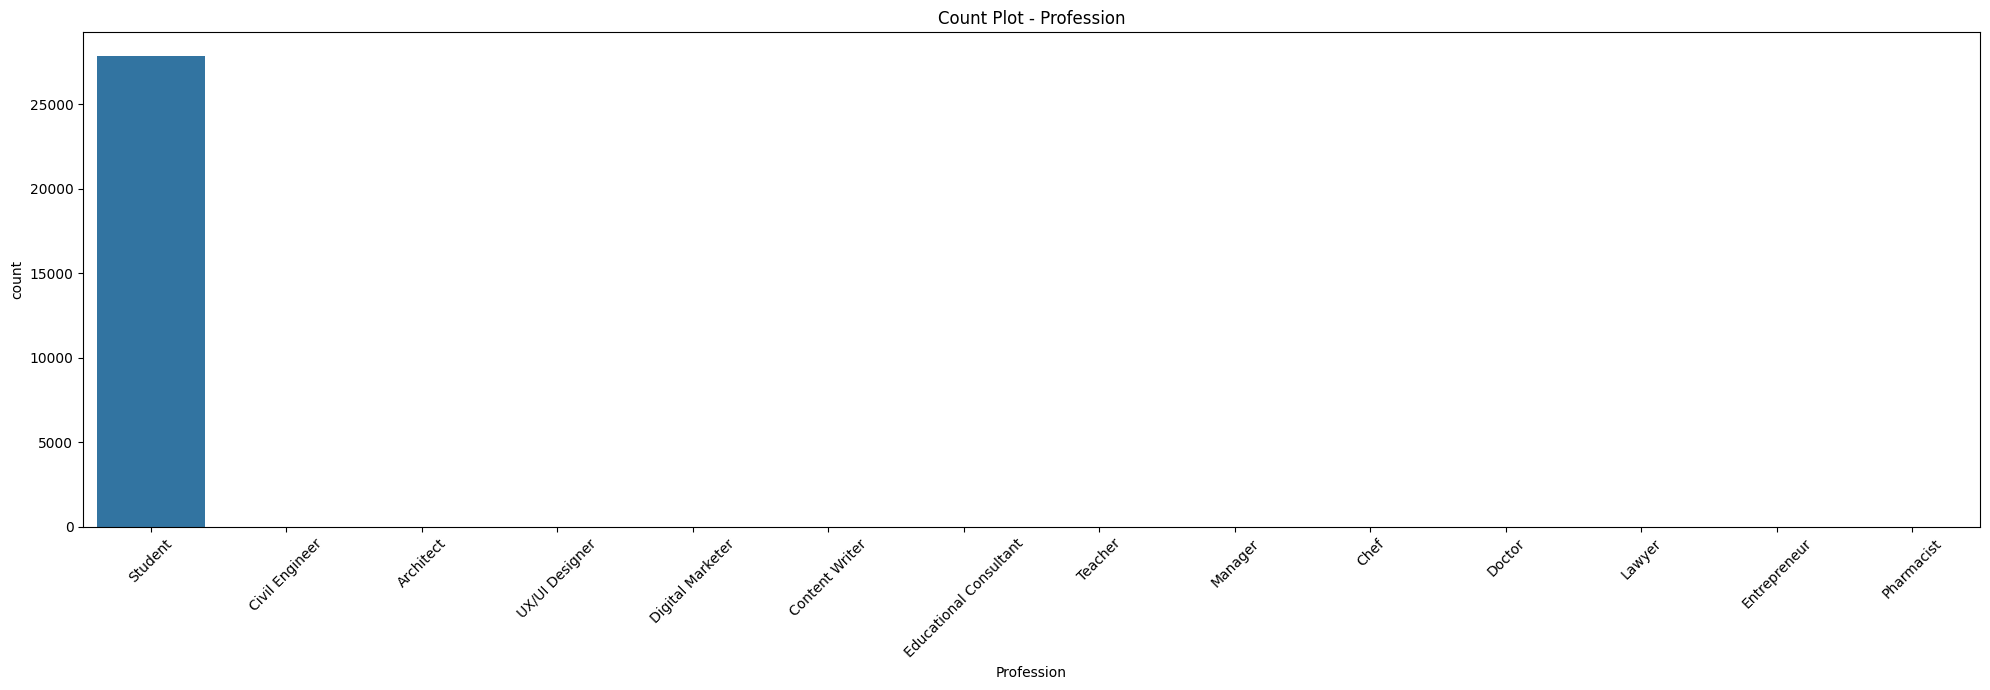

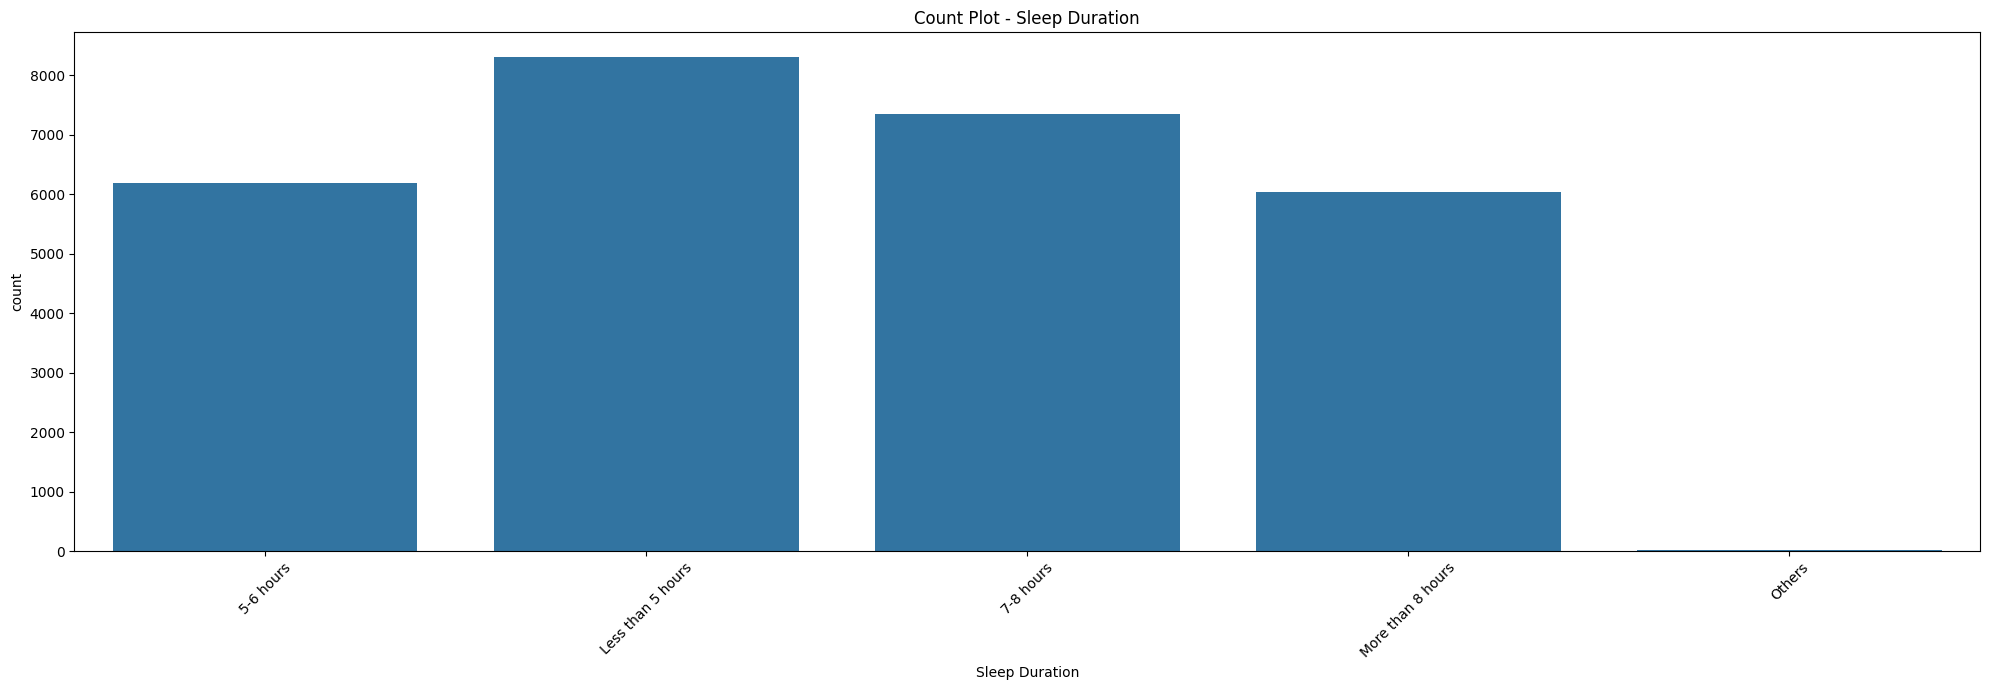

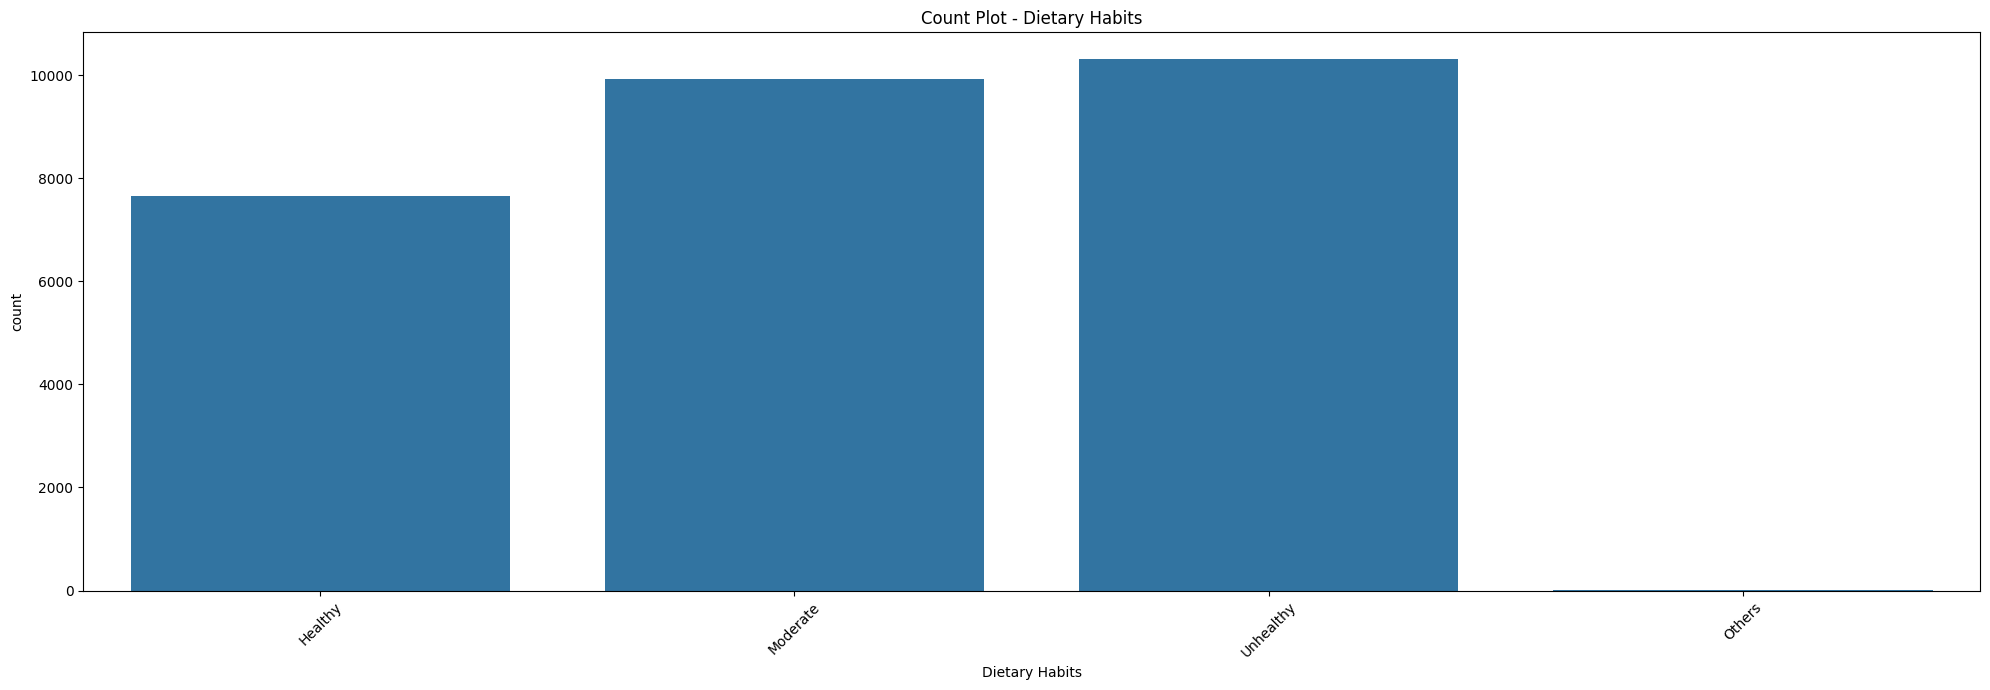

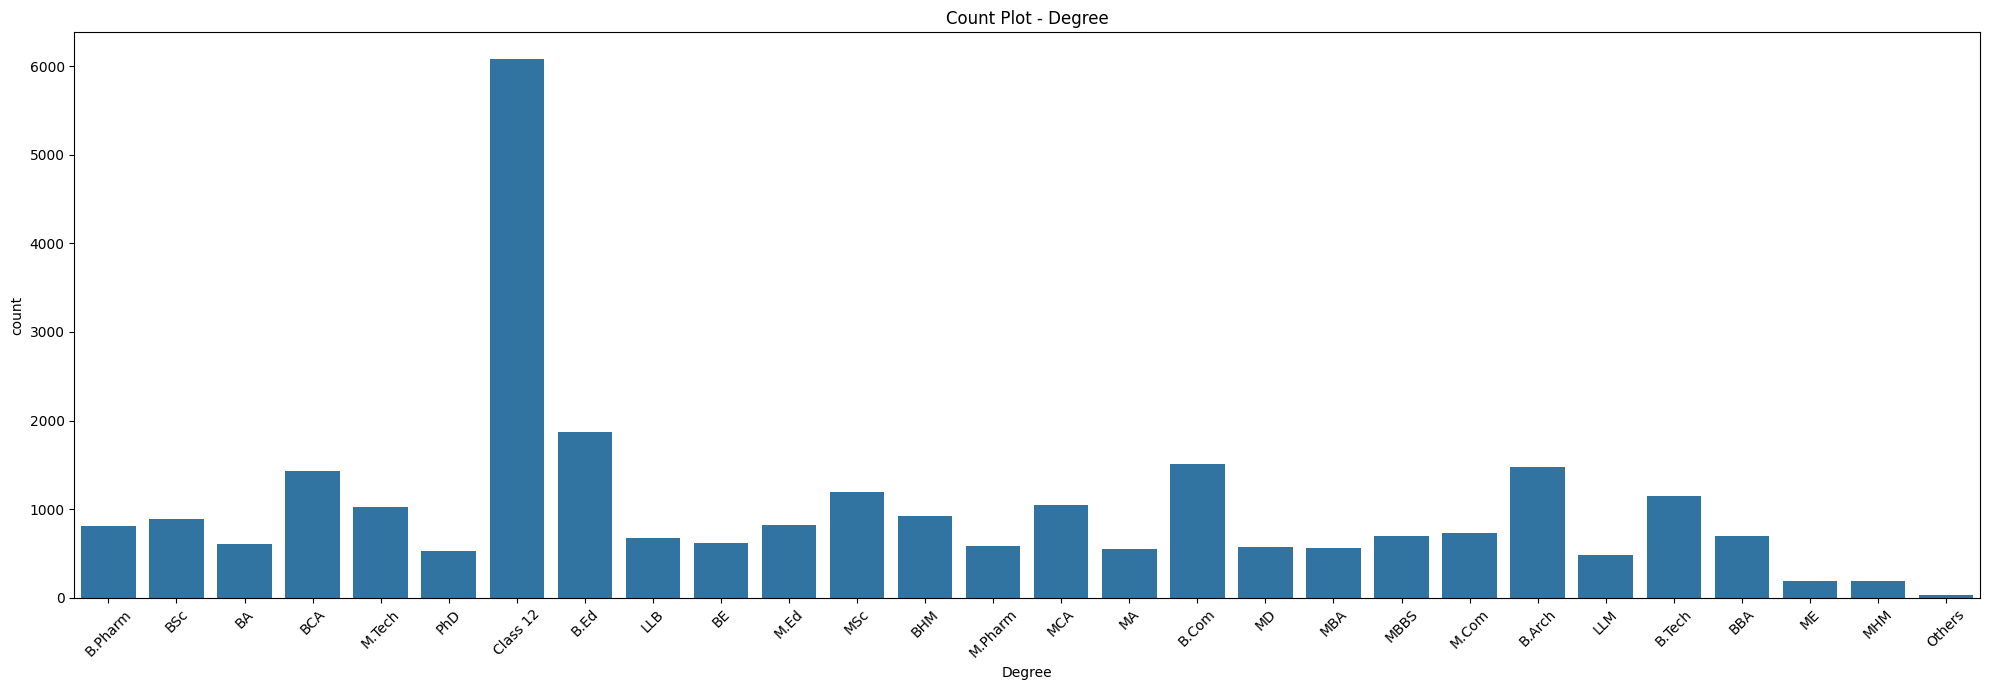

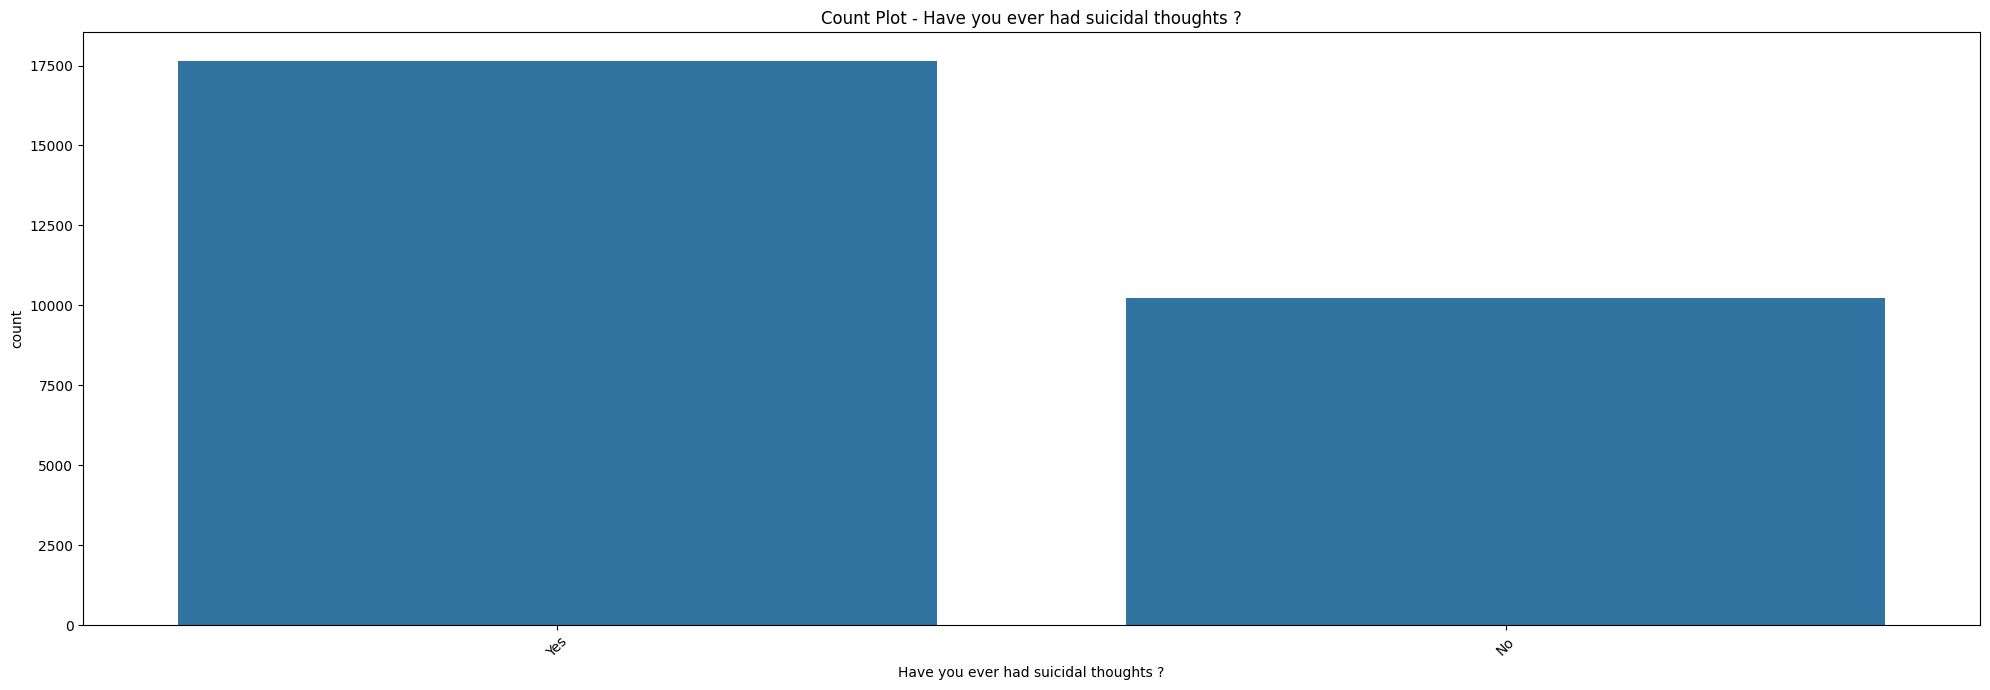

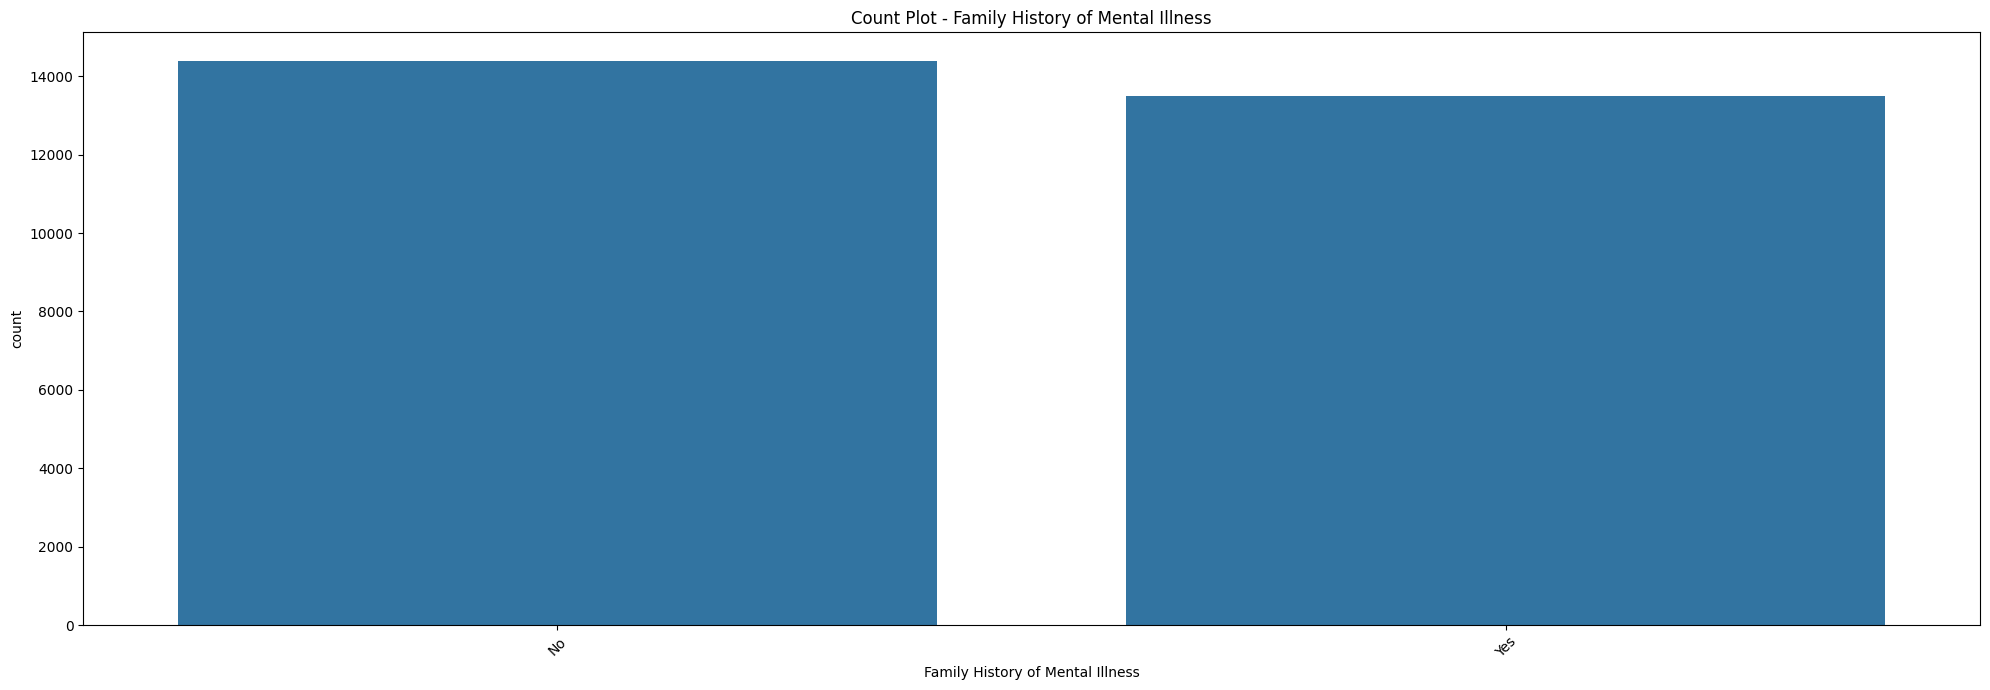

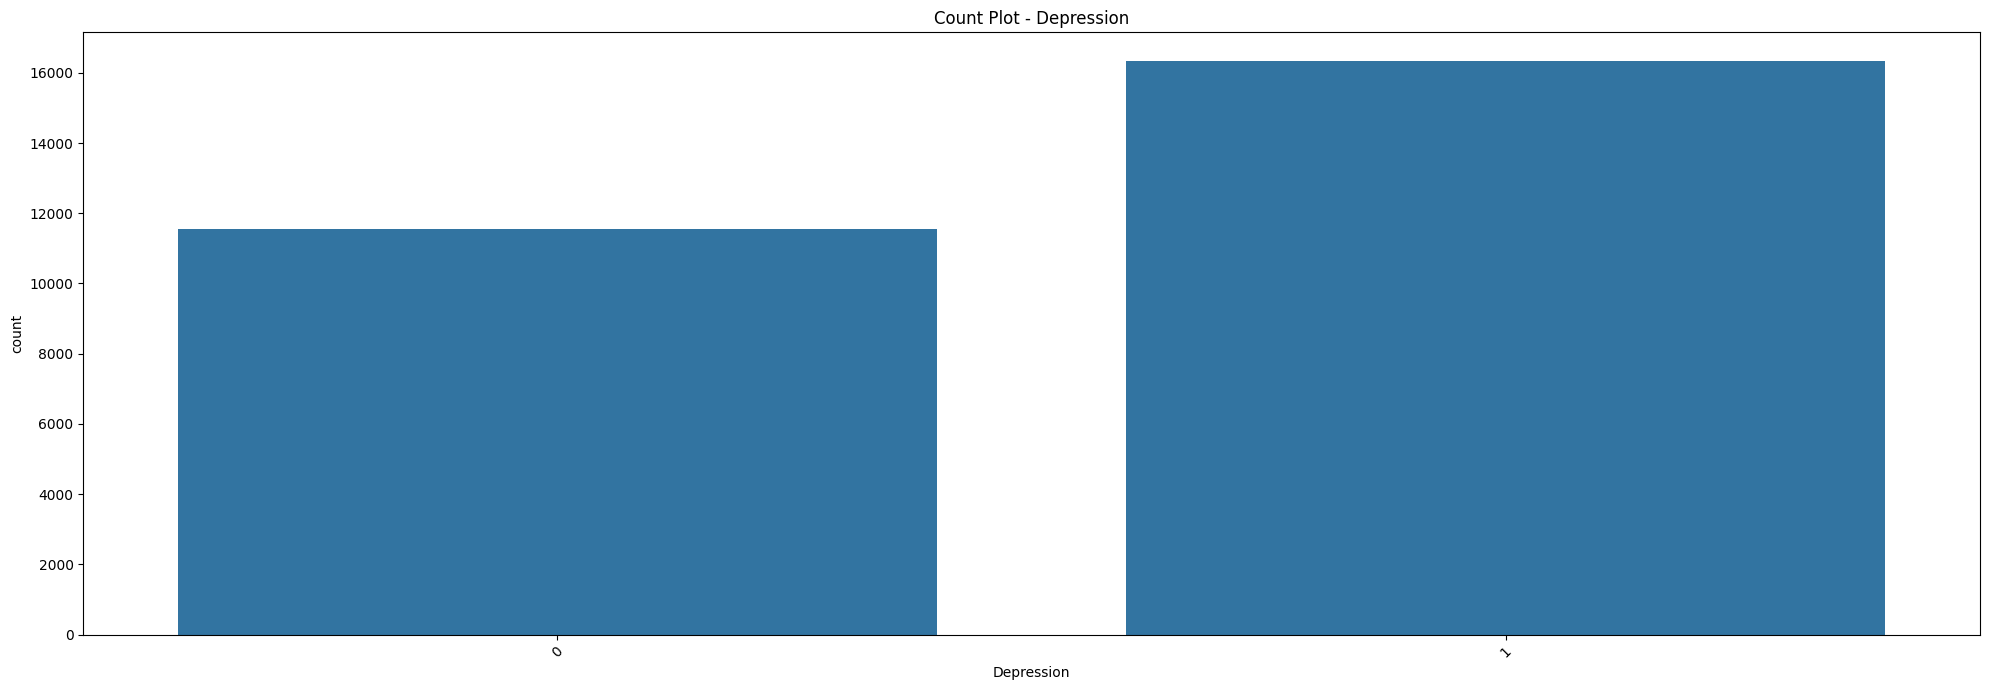

In [ ]:
categorical_cols = [
    'Gender','City','Profession','Sleep Duration','Dietary Habits',
    'Degree','Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness','Depression'
]

for col in categorical_cols:
    plt.figure(figsize=(20, 7))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot - {col}")
    plt.tight_layout()
    plt.show()


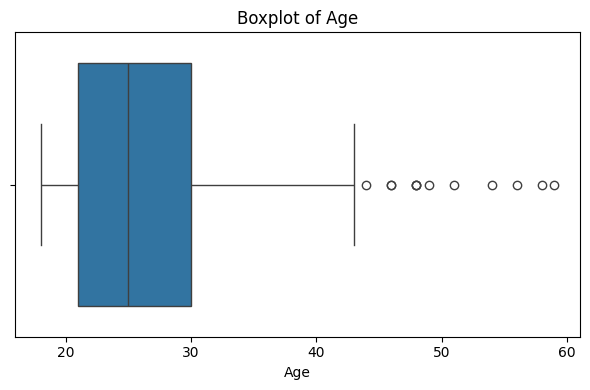

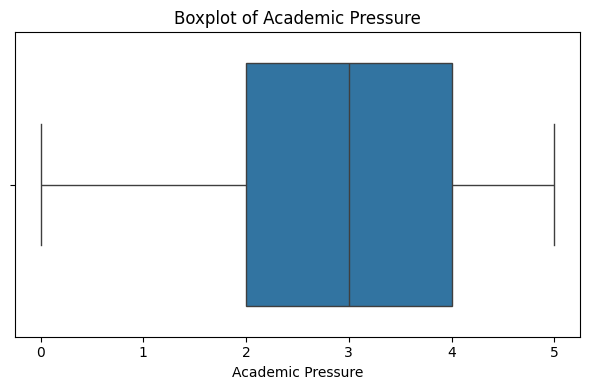

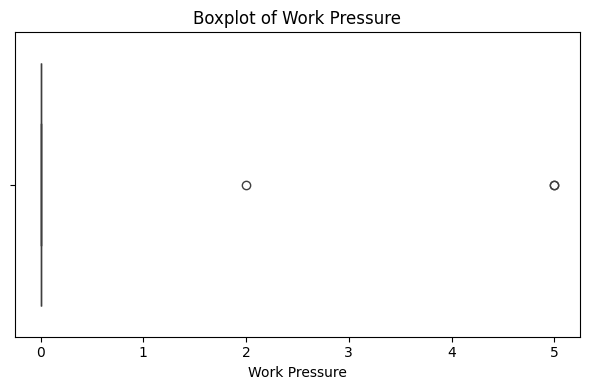

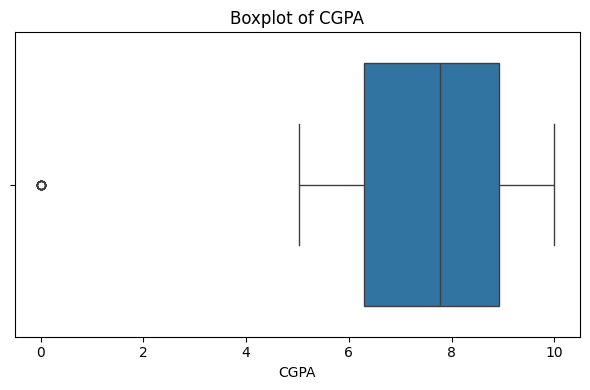

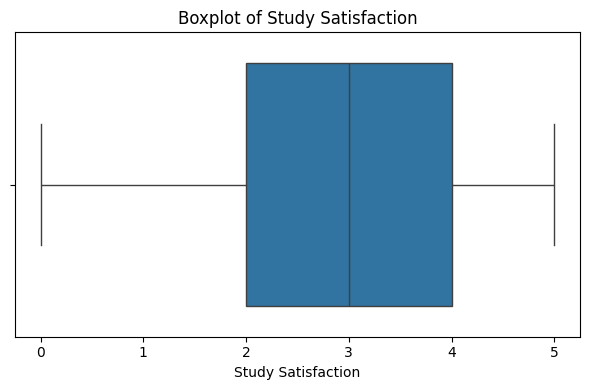

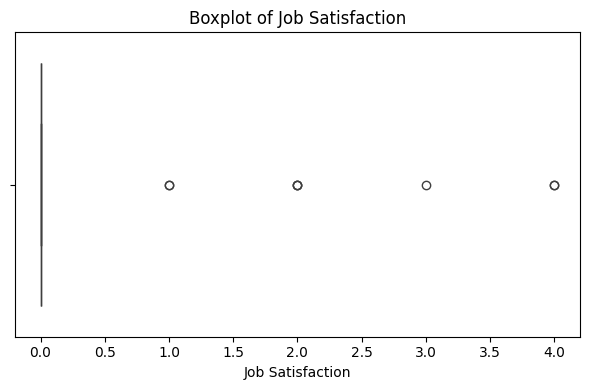

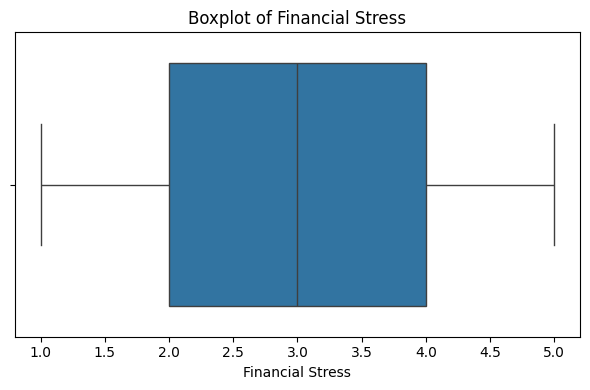

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


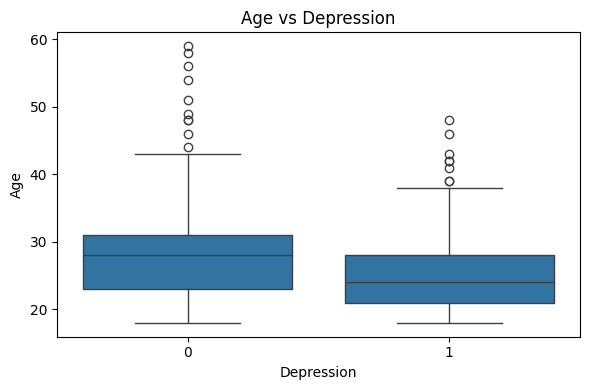

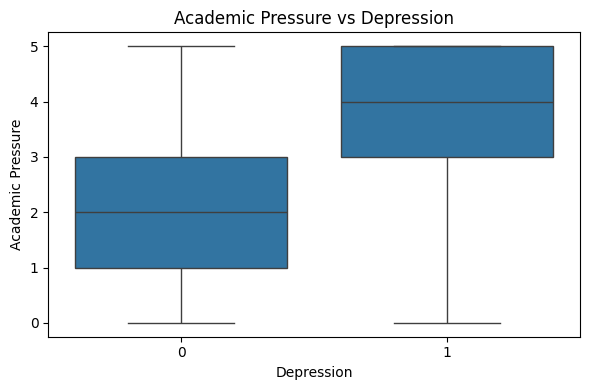

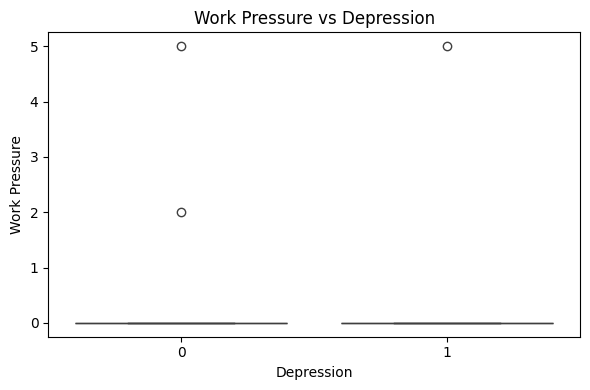

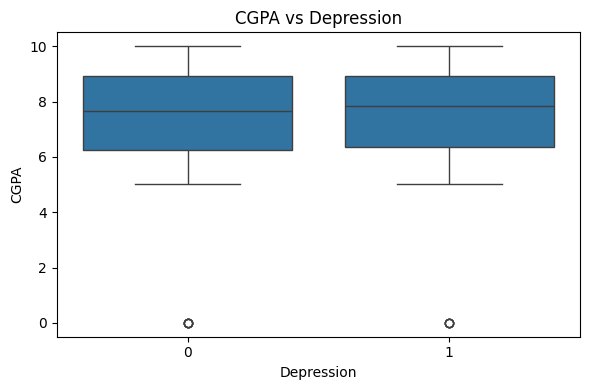

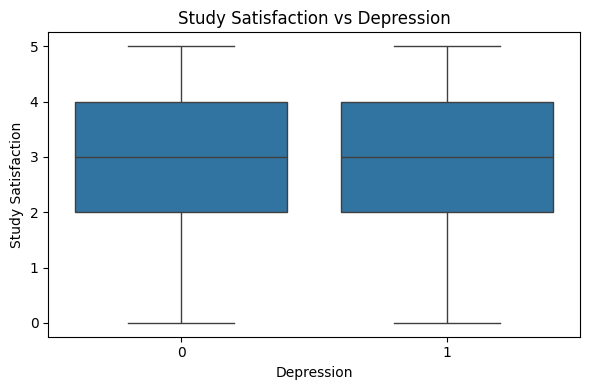

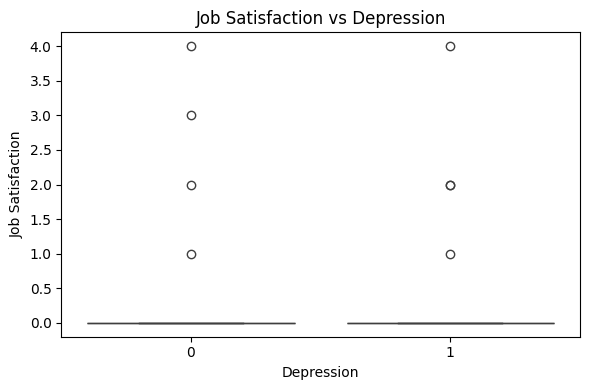

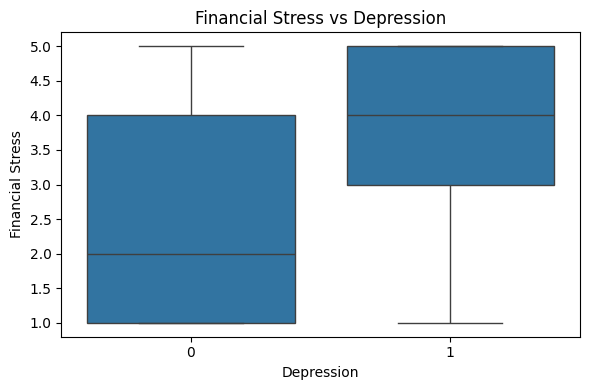

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="Depression", y=col)
    plt.title(f"{col} vs Depression")
    plt.tight_layout()
    plt.show()

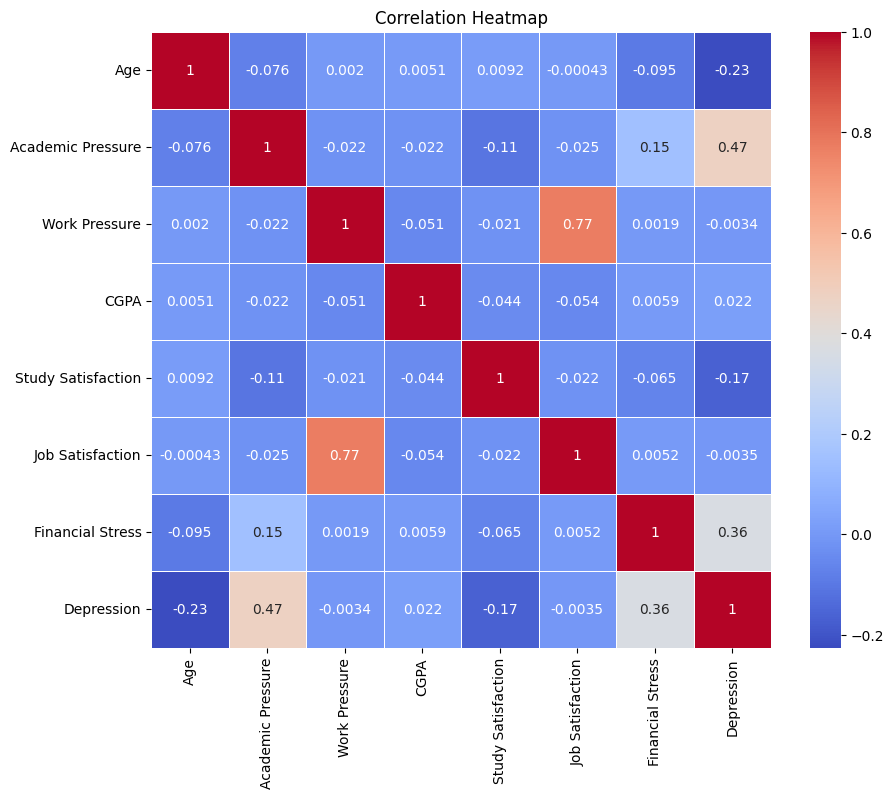

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols + ['Depression']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
depression_data = depression_data.drop('id', axis = 1)
depression_data = depression_data.drop('Profession', axis = 1)
depression_data = depression_data.drop('Degree', axis=1)
depression_data = depression_data.drop('City', axis=1)
depression_data = depression_data.drop('Job Satisfaction', axis=1)
depression_data = depression_data.drop('Work Pressure', axis=1)

#Encoding Categorical data of many values
encoder = LabelEncoder()
depression_data['Dietary Habits'] = encoder.fit_transform(depression_data['Dietary Habits'])
depression_data['Sleep Duration'] = encoder.fit_transform(depression_data['Sleep Duration'])

depression_data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,0,0,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,0,1,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,2,0,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,1,1,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,0,1,Yes,1.0,1.0,No,0


In [ ]:
#One-hot encoding categorical features
depression_data = pd.get_dummies(depression_data, columns=['Gender'], drop_first=True)
depression_data = pd.get_dummies(depression_data, columns=['Family History of Mental Illness'], drop_first=True)
depression_data = pd.get_dummies(depression_data, columns=['Depression'], drop_first=True)
depression_data = pd.get_dummies(depression_data, columns=['Have you ever had suicidal thoughts ?'], drop_first=True)

depression_data.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Gender_Male,Family History of Mental Illness_Yes,Depression_1,Have you ever had suicidal thoughts ?_Yes
0,33.0,5.0,8.97,2.0,0,0,3.0,1.0,True,False,True,True
1,24.0,2.0,5.90,5.0,0,1,3.0,2.0,False,True,False,False
2,31.0,3.0,7.03,5.0,2,0,9.0,1.0,True,True,False,False
3,28.0,3.0,5.59,2.0,1,1,4.0,5.0,False,True,True,True
4,25.0,4.0,8.13,3.0,0,1,1.0,1.0,False,False,False,True


In [ ]:
X = depression_data.drop(['Depression_1'], axis=1)
y = depression_data['Depression_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Scaling numerical features
standard_scaler = StandardScaler()
numerical_features = ['Age','CGPA','Work/Study Hours']
X_train[numerical_features] = standard_scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = standard_scaler.transform(X_test[numerical_features])

KNN

In [ ]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(1, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
{'n_neighbors': np.int64(26)}


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=26)
cv_scores = cross_val_score(KNN_model, X_train, y_train, cv=10, scoring='accuracy')
print("KNN Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

KNN Cross-Validation Scores: [0.82470528 0.8159918  0.83495643 0.83854434 0.83136853 0.82829318
 0.83136853 0.82778063 0.82726807 0.82871795]
Mean Accuracy: 0.8288994729855826


In [ ]:
knn = KNN_model.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)

Accuracy Score: 0.8306422676713312
Precision Score: 0.8264431320251476
Recall Score: 0.895725789799711


2607 911 505 4338


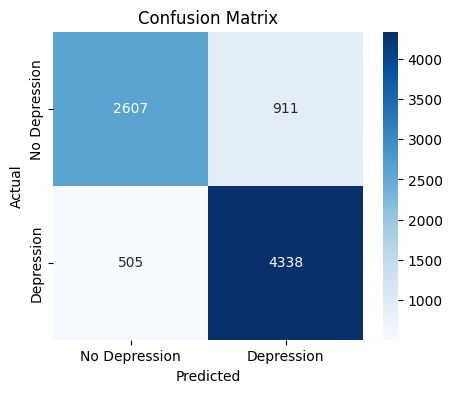

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

SVM

In [ ]:
# Initialize SVM model
svm_model = SVC(kernel='linear', probability=True)
# Perform cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=7, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.84535343 0.85109437 0.85360603 0.84320057 0.84894151 0.844277
 0.8320775 ]
Mean Accuracy: 0.8455072018042955


In [ ]:
# Train best model
best_svm = SVC(kernel='linear', C=10, probability=True)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8469082645616554
              precision    recall  f1-score   support

       False       0.84      0.78      0.81      3518
        True       0.85      0.90      0.87      4843

    accuracy                           0.85      8361
   macro avg       0.85      0.84      0.84      8361
weighted avg       0.85      0.85      0.85      8361



In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)

Accuracy Score: 0.8469082645616554
Precision Score: 0.8482893450635386
Recall Score: 0.895932273384266


2742 776 504 4339


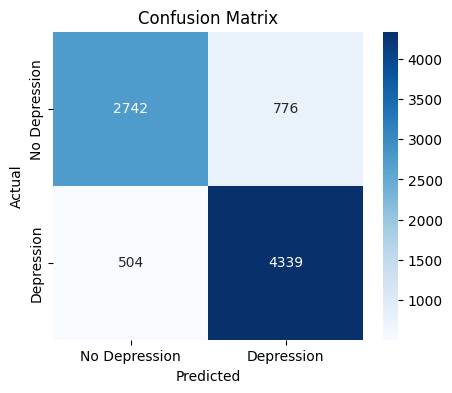

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Logistic Regression

In [ ]:
# Initializing Logistic Regression Model
LR_model = LogisticRegression(class_weight="balanced")

# Training the model
LR_model.fit(X_train, y_train)

# Making predictions
y_pred_LR = LR_model.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_LR)
precision = precision_score(y_test, y_pred_LR)
recall = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.845592632460232
Precision: 0.8738947368421053
Recall: 0.8571133594879207
F1 Score: 0.8654227040550402


2919 599 692 4151


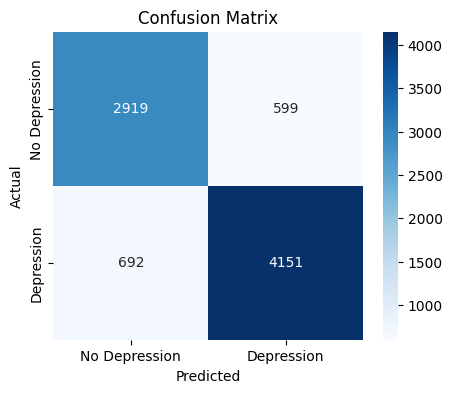

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_LR)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Unsupervised Learning

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
X_unsupervised = X.copy()

scaler_unsup = StandardScaler()
X_unsup_scaled = scaler_unsup.fit_transform(X_unsupervised)

inertia_values = []
silhouette_values = []
K_values = range(2, 10)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_unsup_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_values.append(silhouette_score(X_unsup_scaled, kmeans.labels_))


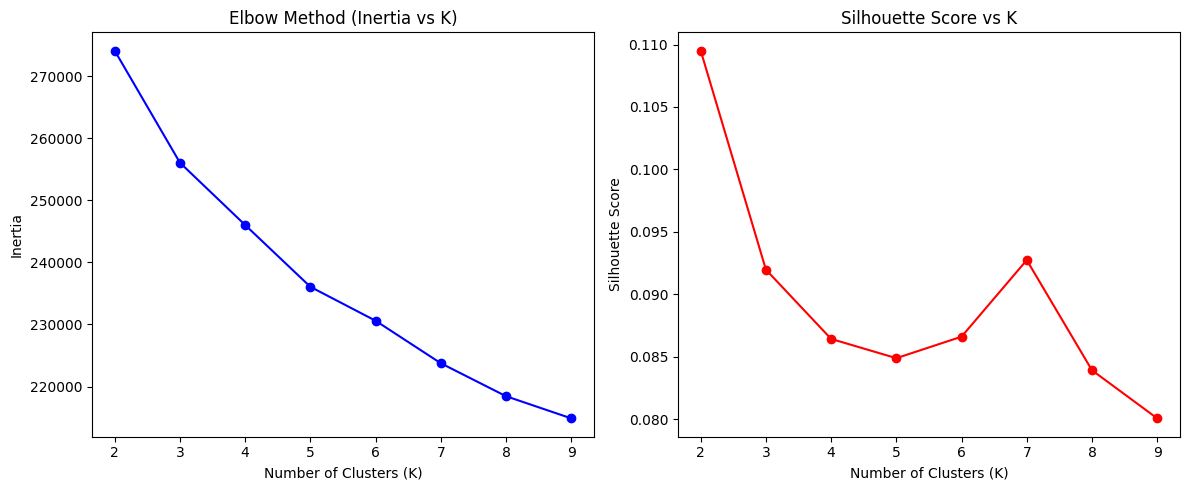

In [ ]:
# Plot Elbow and Silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_values, inertia_values, 'bo-')
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K_values, silhouette_values, 'ro-')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()



In [ ]:
optimal_k = 2
print(f"\nOptimal K chosen for clustering: {optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_unsup_scaled)

# Add cluster labels to dataset
X_unsupervised['Cluster'] = cluster_labels
print("\nCluster counts:\n", X_unsupervised['Cluster'].value_counts())


Optimal K chosen for clustering: 2

Cluster counts:
 Cluster
1    16397
0    11473
Name: count, dtype: int64


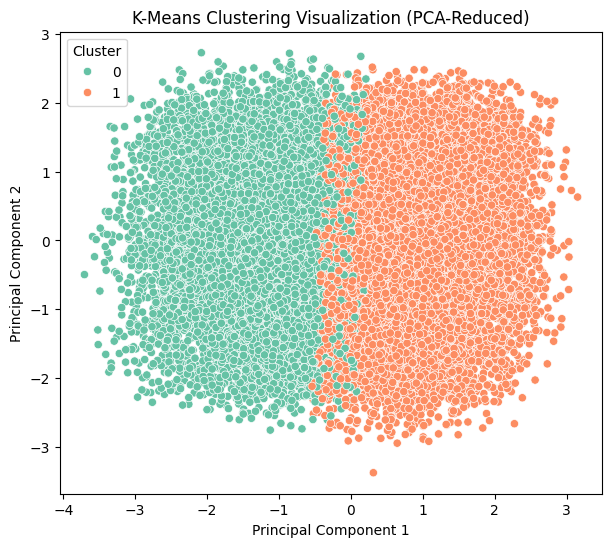


=== Cluster Feature Summary ===
               Age  Academic Pressure      CGPA  Study Satisfaction  \
Cluster                                                               
0        27.167872           2.340364  7.643144            3.246056   
1        24.878819           3.700555  7.665043            2.731902   

         Sleep Duration  Dietary Habits  Work/Study Hours  Financial Stress  \
Cluster                                                                       
0              1.552253        1.128476          6.095703          2.436154   
1              1.482649        1.702385          7.901201          3.632006   

         Gender_Male  Family History of Mental Illness_Yes  \
Cluster                                                      
0           0.555478                              0.447660   
1           0.558395                              0.509239   

         Have you ever had suicidal thoughts ?_Yes  
Cluster                                             
0         

In [ ]:
# Visualize clusters using PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsup_scaled)
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='Set2')
plt.title("K-Means Clustering Visualization (PCA-Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Display average feature values per cluster
cluster_summary = X_unsupervised.groupby('Cluster').mean()
print("\n=== Cluster Feature Summary ===")
print(cluster_summary)